# Table of Contents

* [First Example](#chapter1)
    * [Load data](#section_1_1)
    * [Check out the data](#section_1_2)
    * [First Model Build](#section_1_3)
    * [Model build 2](#section_1_4)

* [Bias and Variance](#chapter2)
    * [Generate predictions for 1st and 4th order models](#section_2_1)
    * [Get MSE, bias and variance](#section_2_2)
    * [Plot predictions](#section_2_3)

* [Contour plots (OLS)](#chapter3)
    * [Contour plot - height by weight](#section_3_1)
    
* [Hard Coded Linear Regression](#chapter4)
    * [Gradient descent class](#section_4_1)
   
* [Logistic Regression](#chapter5)

* [Stepwise Feature Selection](#chapter6)
    * [Gradient descent class](#section_6_1)
    * [Feature Selection - Try 1](#section_6_2)
    * [Feature Selection - Try 2](#section_6_3)
    * [Feature Selection - Try 3](#section_6_4)
    
* [ROC and Calibration Curves](#chapter7)
    * [Stratified Sampling](#section_7_1)
    * [Modelling](#section_7_2)
    * [Plotting](#section_7_3)

* [Regularisation](#chapter8)
    * [Ridge](#section_8_1)
    * [Lasso](#section_8_2)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [2]:
data_path = r'data/classical_machine_learning'

# 1. First Example <a class="anchor" id="chapter1"></a>

## Load data<a class="anchor" id="section_1_1"></a>

In [3]:
file = 'gdp-vs-happiness.csv'
file_path = os.path.join(data_path, file)

df = pd.read_csv(file_path)
df

,Entity,Code,Year,"GDP per capita, PPP (in constant 2011 int-$) (constant 2011 international $)",Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0
...,...,...,...,...,...,...
22109,Zimbabwe,ZWE,2013,1901.183463,4.690188,13327925.0
22110,Zimbabwe,ZWE,2014,1908.477594,4.184451,NaN
22111,Zimbabwe,ZWE,2015,1890.777897,3.703191,NaN
22112,Zimbabwe,ZWE,2016,1859.937441,3.735400,NaN


In [4]:
df.rename(columns= {df.columns[3]:'GDPPerCapita',
                    df.columns[4]:'LifeSatisfaction'}, inplace=True)

df.drop(columns=df.columns[5], inplace=True)
df = df[df['Year']==2016]
df.dropna(inplace=True)

df

C:\Users\Dell5520\AppData\Local\Temp\ipykernel_9432\1317001339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Entity,Code,Year,GDPPerCapita,LifeSatisfaction
70,Afghanistan,AFG,2016,1739.583177,4.220169
177,Albania,ALB,2016,11424.628319,4.511101
250,Algeria,DZA,2016,13974.666225,5.388171
751,Argentina,ARG,2016,18479.442211,6.427221
821,Armenia,ARM,2016,8174.366732,4.325472
...,...,...,...,...,...
21557,Uzbekistan,UZB,2016,6038.871414,5.892539
21848,Vietnam,VNM,2016,5955.261888,5.062267
21969,Yemen,YEM,2016,2325.069960,3.825631
22042,Zambia,ZMB,2016,3636.059711,4.347544


## Check out the data<a class="anchor" id="section_1_2"></a>

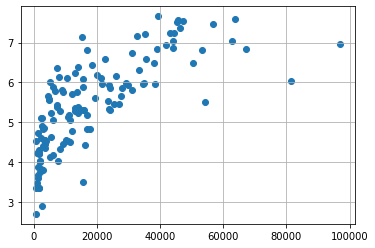

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['GDPPerCapita'], df['LifeSatisfaction'])
ax.grid()

## First model build<a class="anchor" id="section_1_3"></a>

- split data into train and test
- fit Linear Regression with no intercept
- compute performance on test set
- plot data with line of best fit from model coefficient

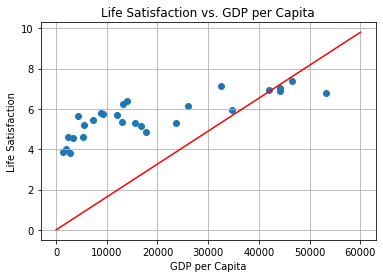

In [6]:
# split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=99)
df_test = df_test.copy() # create copy because we will add a column only to test

# fit model
X_train = df_train[['GDPPerCapita']] # inputs, capital X b/c matrix (only 1 column)
y_train = df_train['LifeSatisfaction'] # labels

model = LinearRegression(fit_intercept=False) # no intercept for illustration
model.fit(X_train, y_train) # this bit is the fitting step

# predictions
X_test = df_test[['GDPPerCapita']] # inputs
y_test = df_test['LifeSatisfaction'] # labels
df_test['LifeSatPred1'] = model.predict(X_test) # this will predict y from X

# compute MSE
mean_squared_error(df_test['LifeSatisfaction'], df_test['LifeSatPred1'])
# 10.072197659608673

# plotting our pred function
fig, ax = plt.subplots()
ax.scatter(df_test['GDPPerCapita'], df_test['LifeSatisfaction'])
ax.grid()
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Satisfaction')
ax.set_title('Life Satisfaction vs. GDP per Capita')

x = np.linspace(0, 60000, 100)
y = model.coef_[0]*x
ax.plot(x,y,c='red')

## Model build 2<a class="anchor" id="section_1_4"></a>

- add intercept

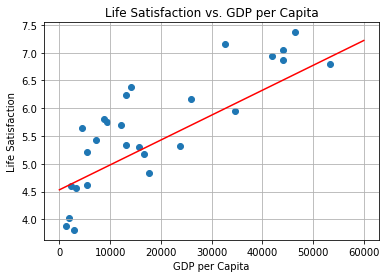

In [7]:
# split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=99)
df_test = df_test.copy() # create copy because we will add a column only to test

# fit model
X_train = df_train[['GDPPerCapita']] # inputs, capital X b/c matrix (only 1 column)
y_train = df_train['LifeSatisfaction'] # labels

model = LinearRegression() # no intercept for illustration
model.fit(X_train, y_train) # this bit is the fitting step

# predictions
X_test = df_test[['GDPPerCapita']] # inputs
y_test = df_test['LifeSatisfaction'] # labels
df_test['LifeSatPred1'] = model.predict(X_test) # this will predict y from X

# compute MSE
mean_squared_error(df_test['LifeSatisfaction'], df_test['LifeSatPred1'])
# 0.4003701465037115

# plotting our pred function
fig, ax = plt.subplots()
ax.scatter(df_test['GDPPerCapita'], df_test['LifeSatisfaction'])
ax.grid()
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Satisfaction')
ax.set_title('Life Satisfaction vs. GDP per Capita')

x = np.linspace(0, 60000, 100)
y = model.coef_[0]*x + model.intercept_
ax.plot(x,y,c='red')

# 2. Bias and Variance<a class="anchor" id="chapter2"></a>

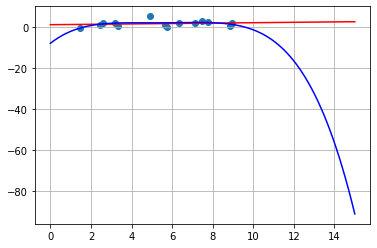

In [8]:
N = 15
x = np.random.uniform(1,10,size=N)
eps = np.random.normal(0,1,size=N)
y = np.log(x) + eps

X = pd.DataFrame(x, columns=['x'])
X['X2'] = x**2
X['X3'] = x**3
X['X4'] = x**4

model = LinearRegression()
model.fit(X[['x']],y)

model2 = LinearRegression()
model2.fit(X,y)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.grid()
x1 = np.linspace(0, 15, 100)
y1 = model.coef_[0]*x1  + model.intercept_
x2 = np.linspace(0, 15, 100)
y2 = model2.coef_[0]*x2 + model2.coef_[1]*(x2**2) + model2.coef_[2]*(x2**3) + model2.coef_[3]*(x2**4) + model2.intercept_
ax.plot(x1,y1,c='red')
ax.plot(x2,y2,c='blue')

In [9]:
def generate_data(N):
    
    x  = np.random.uniform(1, 10, size=N)
    e  = np.random.normal(0, 1, size=N)
    Y  = np.log(x) + e
    df = pd.DataFrame(x, columns=['x'])
    df['x2'] = x**2
    df['x3'] = x**3
    df['x4'] = x**4
    df['y']  = Y
    
    return df

In [10]:
# Experimental parameters
N = 15
num_experiments = 1000

# Generate point of interest
x0 = 5
y0 = np.log(x0) # Assume there is no error for y0
X0 = pd.DataFrame([[x0, x0**2, x0**3, x0**4]], columns=['x', 'x2', 'x3', 'x4'])

## Generate predictions for 1st and 4th order models<a class="anchor" id="section_2_1"></a>

In [11]:
# Generate predictions
predictions_linear1 = []
predictions_linear4 = []

models_linear1 = []
models_linear4 = []

for i in tqdm(range(num_experiments)):
    
    # Generate training set
    df = generate_data(N)
    
    # Model Fitting (first order linear)
    # y_hat = beta*x + b
    model_l1 = LinearRegression()
    model_l1.fit(df[['x']], df['y'])
    
    predictions_linear1.append(model_l1.predict(X0[['x']])[0])
    models_linear1.append(model_l1)
    
    # Model Fitting (fourth order linear)
    # y_hat = beta1*x + beta2*x**2 + beta3*x**3 + beta4*x**4 + b
    model_l4 = LinearRegression()
    model_l4.fit(df[['x','x2','x3','x4']], df['y'])
    
    predictions_linear4.append(model_l4.predict(X0)[0])
    models_linear4.append(model_l4)


# Put predictions in numpy arrays for convenience
predictions_linear1 = np.array(predictions_linear1)
predictions_linear4 = np.array(predictions_linear4)

100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.68it/s]


## Get MSE, bias and variance<a class="anchor" id="section_2_2"></a>

In [19]:
# MSE
mse_l1 = ((predictions_linear1 - np.log(x0))**2).mean()
mse_l4 = ((predictions_linear4 - np.log(x0))**2).mean()
print('mse at x0 (first  order linear): ', round(mse_l1, 3))
print('mse at x0 (fourth order linear): ', round(mse_l4, 3))

# Bias
bias_l1 = predictions_linear1.mean() - np.log(x0)
bias_l4 = predictions_linear4.mean() - np.log(x0)
print('\nbias at x0 (first  order linear): ', round(bias_l1, 3))
print('bias at x0 (fourth order linear): ', round(bias_l4, 3))
print('\nsquared bias at x0 (first  order linear): ', round(bias_l1**2, 6))
print('squared bias at x0 (fourth order linear): ', round(bias_l4**2, 6))

# Variance
var_l1 = predictions_linear1.var()
var_l4 = predictions_linear4.var()
print('\nvariance at x0 (first  order linear): ', round(var_l1, 3))
print('variance at x0 (fourth order linear): ', round(var_l4, 3))

mse at x0 (first  order linear):  0.097
mse at x0 (fourth order linear):  0.345

bias at x0 (first  order linear):  -0.149
bias at x0 (fourth order linear):  -0.021

squared bias at x0 (first  order linear):  0.022263
squared bias at x0 (fourth order linear):  0.000434

variance at x0 (first  order linear):  0.075
variance at x0 (fourth order linear):  0.344


## Plot predictions<a class="anchor" id="section_2_3"></a>

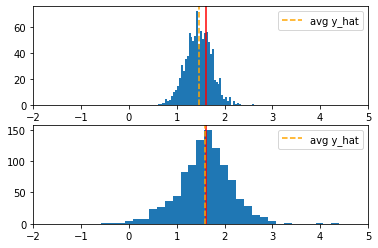

In [14]:
def plot_histogram(ax, preds, y0, bins=50, lower=-2, upper=5):
    ax.hist(preds, bins=bins)
    ax.axvline(y0, c='red')
    ax.axvline(preds.mean(), c='orange', linestyle='--', label='avg y_hat')
    ax.set_xlim(lower, upper)
    ax.legend()

# Plotting
fig, axarr = plt.subplots(2)
plot_histogram(axarr[0], predictions_linear1, y0)
plot_histogram(axarr[1], predictions_linear4, y0)

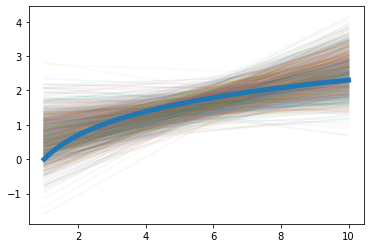

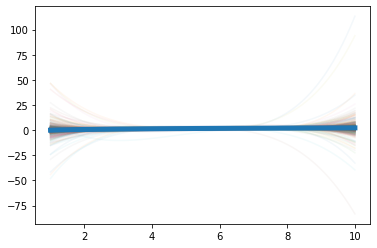

In [15]:
def generate_dummy_x():
    x = np.linspace(1,10,100)
    df = pd.DataFrame(x, columns=['x'])
    df['x2'] = x**2
    df['x3'] = x**3
    df['x4'] = x**4
    return df

df_dummy = generate_dummy_x()

fig, ax = plt.subplots()
for model in models_linear1:
    y_hat = model.predict(df_dummy[['x']])
    ax.plot(df_dummy['x'], y_hat, alpha=0.05)

ax.plot(df_dummy['x'], np.log(df_dummy['x']), linewidth=5)



fig, ax = plt.subplots()
for model in models_linear4:
    y_hat = model.predict(df_dummy)
    ax.plot(df_dummy['x'], y_hat, alpha=0.05)

ax.plot(df_dummy['x'], np.log(df_dummy['x']), linewidth=5)

# 3. Contour plots (OLS)<a class="anchor" id="chapter3"></a>

In [3]:
file = 'gender_cleaned_test_train.xlsx'
file_path = os.path.join(data_path, file)

data_train = pd.read_excel(file_path, sheet_name='train')
data_test = pd.read_excel(file_path, sheet_name='test')

In [25]:
# linear regression, height from weight

model = LinearRegression()
model.fit(data_train[['Weight']],data_train[['Height']])

data_test['height_from_weight'] = model.predict(data_test[['Weight']])

mean_squared_error(data_test['Height'], data_test['height_from_weight'])
# 13.360583881226942

13.360583881226942

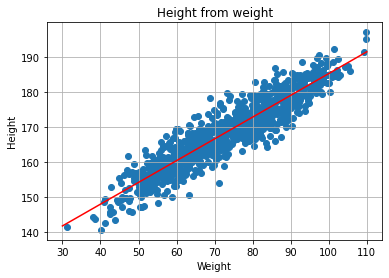

In [26]:
fig, ax = plt.subplots()
ax.scatter(data_test['Weight'], data_test['Height'])
ax.grid()
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Height from weight')

x = np.linspace(30, 110, 100)
y = model.coef_[0]*x + model.intercept_
ax.plot(x,y,c='red')

In [27]:
# linear regression, weight from height and gender

model = LinearRegression()
model.fit(data_train[['Height','IsMale']],data_train[['Weight']])

data_test['weight_from_height_gender'] = model.predict(data_test[['Height','IsMale']])

mean_squared_error(data_test['Weight'], data_test['weight_from_height_gender'])
#20.030050618448396

20.030050618448396

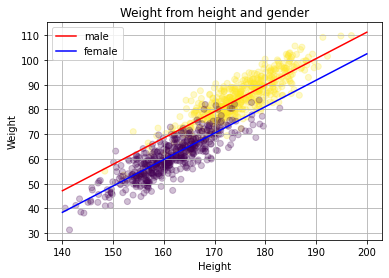

In [32]:
fig, ax = plt.subplots()
ax.scatter(data_test['Height'], data_test['Weight'], c=data_test['IsMale'], alpha=0.25)
ax.grid()
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Weight from height and gender')

x = np.linspace(140, 200, 100)
y_male = model.coef_[0][0]*x + model.coef_[0][1]*1 + model.intercept_[0]
y_female = model.coef_[0][0]*x + model.coef_[0][1]*0 + model.intercept_[0]

ax.plot(x,y_male,c='red', label='male')
ax.plot(x,y_female,c='blue', label='female')

ax.legend()

## Contour plot - height by weight<a class="anchor" id="section_3_1"></a>

Text(0, 0.5, 'beta')

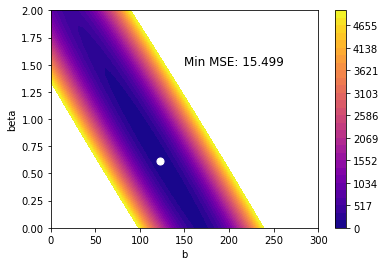

In [50]:
@np.vectorize
def emp_risk(b, beta):
    y = data_train['Height']
    y_hat = b + beta*data_train['Weight']
    mse = mean_squared_error(y, y_hat)
    return mse

N = 50

bs = np.linspace(0, 300, N)
betas = np.linspace(0, 2, N)

B, BETA = np.meshgrid(bs, betas) # create grid of possible Betas and constants

EMP_RISK = emp_risk(B, BETA) # mse for each combination

fig, ax = plt.subplots()
qcs = ax.contourf(B, BETA, EMP_RISK, levels=np.linspace(0,5000,30), cmap='plasma')
plt.colorbar(qcs)

argmin = np.unravel_index(np.argmin(EMP_RISK, axis=None), EMP_RISK.shape) # find index of minimum MSE

min_error = round(EMP_RISK[argmin], 3)
b_star = B[argmin]
beta_star = BETA[argmin]

text_arg = f"Min MSE: {min_error}"

ax.scatter(b_star, beta_star, c='white', s=50) # put minimum point
ax.text(150, 1.5, text_arg, {'color': 'black', 'fontsize': 12}) # add text to show min MSE

ax.set_xlabel('b')
ax.set_ylabel('beta')

# 4. Hard coded Linear Regression<a class="anchor" id="chapter4"></a>

In [53]:
file = 'gender_cleaned_test_train.xlsx'
file_path = os.path.join(data_path, file)

data_train = pd.read_excel(file_path, sheet_name='train')
data_test = pd.read_excel(file_path, sheet_name='test')

X_train = data_train[['Weight']]
y_train = data_train['Height']

X_test = data_test[['Weight']]
y_test = data_test['Height']

In [54]:
def gradient(b, beta, X, y):
    
    '''
    Returns 
    -------
    Gradient of the obj fct wrt b and beta

    '''
    
    N = len(X)
    y_hat = b + beta * X
    
    grad_b = -2 / (N * np.sum(y - y_hat))
    grad_beta = -2 / (N * np.sum((y - y_hat) * X))
    
    return np.array([grad_b, grad_beta])

In [56]:
# Gradient descent - small learning rate

alpha = 0.0001 # learning rate

Beta = np.array([0,0]) # initial beta (b, beta)

n_iter = 10000

for iteration in tqdm(range(n_iter)):
    
    grad = gradient(Beta[0], Beta[1], data_train['Weight'], data_train['Height'])
    
    Beta = Beta - alpha*grad
    
print('b :', Beta[0])
print('beta :', Beta[1])

y_hat = Beta[0] + Beta[1]*data_test['Weight']

mse = mean_squared_error(data_test['Height'], y_hat)

print('mse :', mse)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 772.17it/s]

b : 1.464597377924434e-10
beta : 1.9755449085752702e-12
mse : 28354.48954581499


In [59]:
# Gradient descent - higher learning rate

alpha = 0.1 # learning rate

Beta = np.array([0,0]) # initial beta (b, beta)

n_iter = 10000

for iteration in tqdm(range(n_iter)):
    
    grad = gradient(Beta[0], Beta[1], data_train['Weight'], data_train['Height'])
    
    Beta = Beta - alpha*grad
    
print('b :', Beta[0])
print('beta :', Beta[1])

y_hat = Beta[0] + Beta[1]*data_test['Weight']

mse = mean_squared_error(data_test['Height'], y_hat)

print('mse :', mse)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 752.02it/s]

b : 1.4645973791884784e-07
beta : 1.975544910295123e-09
mse : 28354.489447835495


## Gradient descent class<a class="anchor" id="section_4_1"></a>

In [63]:
# has fit and predict methods like sklearn

class LinRegGradDesc:
    '''
    Linear regression using gradient descent
    '''
    def __init__(self, alpha = 0.00001, num_iter = 50000, init_guess=None):
        
        self.alpha    = alpha
        self.num_iter = num_iter
        self.trace    = []
        
        if init_guess is None:
            self.beta = np.array([0, 0])
        else:
            self.beta = init_guess
            
    def fit(self, x, y):
        
        for iteration in tqdm(range(self.num_iter)):
            grad = gradient(self.beta[0], self.beta[1], x, y)
            self.beta = self.beta - self.alpha * grad
            
            mse = mean_squared_error(y, self.predict(x))
            self.trace.append(mse)
            
    def predict(self, x):
        
        y_hat = self.beta[0] + self.beta[1] * x
        
        return y_hat

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250000/250000 [04:29<00:00, 927.94it/s]


mse : 1023.4091242353884
b : 100.00000019184654
beta : 0.5000000026090241


Text(0, 0.5, 'mse')

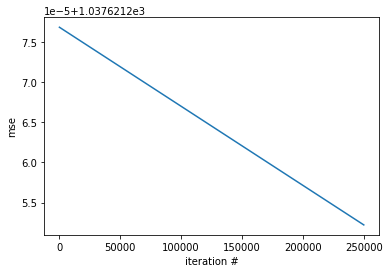

In [64]:
model = LinRegGradDesc(
    init_guess=np.array([100, 0.5]), 
    num_iter=250000,
    alpha=0.001
)

model.fit(data_train['Weight'], data_train['Height'])

y_hat = model.predict(data_test['Weight'])
mse = mean_squared_error(data_test['Height'], y_hat)

print('mse :', mse)
print('b :', model.beta[0])
print('beta :', model.beta[1])

fig, ax = plt.subplots()
ax.plot(model.trace)
ax.set_xlabel('iteration #')
ax.set_ylabel('mse')

# 5. Logistic Regression<a class="anchor" id="chapter5"></a>

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
file = 'gender_cleaned_test_train.xlsx'
file_path = os.path.join(data_path, file)

data_train = pd.read_excel(file_path, sheet_name='train')
data_test = pd.read_excel(file_path, sheet_name='test')

X_train = data_train[['Weight']]
y_train = data_train['IsMale']

X_test = data_test[['Weight']]
y_test = data_test['IsMale']

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)

y_hatp_test = model.predict_proba(X_test)
y_hatp_train = model.predict_proba(X_train)

beta = model.coef_[0][0] # 0.2988
b = model.intercept_[0] # -21.88

#model 
#y_hat = sigmoid(0.26681834*x -44.96987471)

In [74]:
print(f'Training accuracy: {accuracy_score(y_train, y_hat_train)}')
print(f'Testing accuracy: {accuracy_score(y_test, y_hat_test)}')

Training accuracy: 0.9054339371041227
Testing accuracy: 0.919080919080919


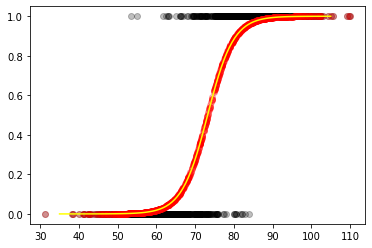

In [77]:
# plot

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(35, 105, 100)
y = beta * x + b

fig, ax = plt.subplots()
ax.plot(x, sigmoid(y), c='yellow')
ax.scatter(X_test, y_test, c='black', alpha = 0.25)
ax.scatter(X_test, y_hatp_test[:,1], c='red', alpha = 0.25) # probs are on the line

# 6. Stepwise Feature Selection<a class="anchor" id="chapter6"></a>

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
from sklearn import feature_selection

In [78]:
file  = 'mystery_data.csv'
file_path  = os.path.join(data_path, file)

df = pd.read_csv(file_path)
df

,y,x1,x2,x3,x4,x5,x6
0,187.571423,1,-67.613627,109.819678,107.654284,109.983329,-23.481933
1,174.706036,1,2.427624,73.688955,87.370309,116.699535,6.391971
2,188.239668,1,22.095728,96.584348,84.903809,113.615857,-19.427906
3,182.196685,1,113.056816,99.899282,112.489678,111.041085,84.339364
4,177.499762,1,-34.460890,93.682809,94.608713,117.420734,-110.499751
...,...,...,...,...,...,...,...
8994,168.078537,0,-5.760109,62.096964,76.455759,85.833949,-21.241239
8995,170.350573,0,89.001816,77.574029,95.922168,109.579885,52.394905
8996,162.224700,0,107.322607,58.327795,51.883354,72.821470,105.924965
8997,175.346978,0,33.099696,74.389017,49.413372,18.182795,-28.109388


## EDA<a class="anchor" id="section_6_1"></a>

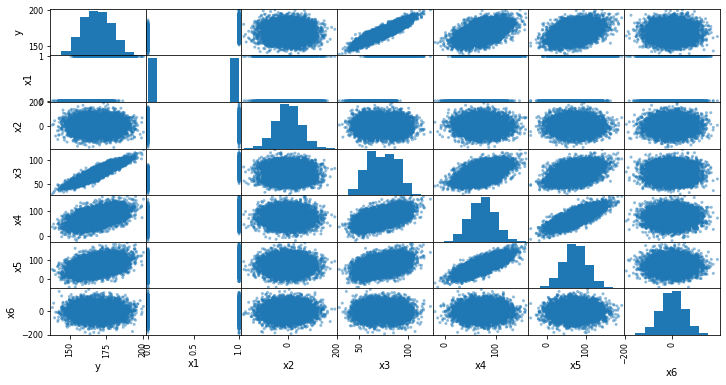

In [82]:
pd.plotting.scatter_matrix(df, figsize=(12,6)); 

# seems like there may be something withx1, x3, x4, x5
# semi-colon here to stop text coming

In [80]:
df.corr() #correlation matrix

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.689564,-0.007198,0.924526,0.538885,0.416549,-0.007469
x1,0.689564,1.000000,-0.011918,0.795011,0.462838,0.359521,-0.006586
x2,-0.007198,-0.011918,1.000000,-0.006351,-0.006763,-0.003054,0.019166
x3,0.924526,0.795011,-0.006351,1.000000,0.579495,0.450296,-0.010382
x4,0.538885,0.462838,-0.006763,0.579495,1.000000,0.780665,0.004054
x5,0.416549,0.359521,-0.003054,0.450296,0.780665,1.000000,0.003358
x6,-0.007469,-0.006586,0.019166,-0.010382,0.004054,0.003358,1.000000


## Feature Selection - Try 1<a class="anchor" id="section_6_2"></a>

In [84]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=99)
df_test = df_test.copy()

X_train = df_train[['x1','x2','x3','x4','x5','x6']]
y_train = df_train['y']
y_test = df_test['y']

scores = f_regression(X_train, y_train)
scores

model = feature_selection.SelectKBest(score_func=f_regression, k=2)
model.fit(X_train, y_train)

X = X_train.iloc[:,model.get_support()]

linmod = LinearRegression()
linmod.fit(X,y_train)

X_test_all = df_test[['x1','x2','x3','x4','x5','x6']]
X_test = X_test_all.iloc[:,model.get_support()]
y_hat_test = linmod.predict(X_test)

mean_squared_error(y_test,y_hat_test)

13.288184532386072

## Feature Selection - Try 2<a class="anchor" id="section_6_3"></a>

In [86]:
X_train_all = df_train[['x1','x2','x3','x4','x5','x6']]
X_test_all = df_test[['x1','x2','x3','x4','x5','x6']]
y_train = df_train['y']
y_test = df_test['y']

def forward_stepwise(X_train_all, X_test_all, y_train, y_test):
    
    for iteration in range(1, len(X_train_all.columns)):
        
        select = feature_selection.SelectKBest(score_func=f_regression, k=iteration)
        select.fit(X_train_all, y_train)
    
        X_train = X_train_all.iloc[:, select.get_support()]
        X_test = X_test_all.iloc[:, select.get_support()]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_hat_train = model.predict(X_train)
        y_hat_test = model.predict(X_test)
        
        mse_train = mean_squared_error(y_train, y_hat_train)
        mse_test = mean_squared_error(y_test, y_hat_test)
        
        our_cols = X_train_all.iloc[:, select.get_support()].columns.values
        
        print(f'For {iteration} variables, the lowest train mse we can achieve is ', mse_train)
        print(f'For {iteration} variables, the lowest test mse we can achieve is ', mse_test)
        print('Our variables are ', our_cols)
        print('-------------------------------')
    

forward_stepwise(X_train_all, X_test_all, y_train, y_test)

For 1 variables, the lowest train mse we can achieve is  13.900319279611754
For 1 variables, the lowest test mse we can achieve is  13.815364301154965
Our variables are  ['x3']
-------------------------------
For 2 variables, the lowest train mse we can achieve is  13.361505400642004
For 2 variables, the lowest test mse we can achieve is  13.288184532386072
Our variables are  ['x1' 'x3']
-------------------------------
For 3 variables, the lowest train mse we can achieve is  13.35742308721907
For 3 variables, the lowest test mse we can achieve is  13.298891472479236
Our variables are  ['x1' 'x3' 'x4']
-------------------------------
For 4 variables, the lowest train mse we can achieve is  13.348702065103993
For 4 variables, the lowest test mse we can achieve is  13.344966778679503
Our variables are  ['x1' 'x3' 'x4' 'x5']
-------------------------------
For 5 variables, the lowest train mse we can achieve is  13.347792416372169
For 5 variables, the lowest test mse we can achieve is  13.

## Feature Selection - Try 3<a class="anchor" id="section_6_4"></a>

In [88]:
def forward_stepwise(X, y):
    '''
    Returns a sequence of models constructed using forward subset selection.
    '''
    # A list of features already in the model
    feature_list = []
    
    # A list of models
    models = []
    
    # Define candidates
    candidates = set(X.columns)
    p = len(X.columns)
    
    # Building the model sequence
    for i in range(0, p):
        
        # Keeping track of variables
        best_mse     = np.inf
        best_model   = None
        best_feature = None
        
        # Find the next best predictor
        for x in candidates:
            
            # Fitting
            model = LinearRegression()
            curr_features = feature_list + [x]
            model.fit(X[curr_features], y)
            
            # Evaluate on the training set
            y_hat = model.predict(X[curr_features])
            mse   = mean_squared_error(y, y_hat)
            
            # Keeping track of the best feature and model
            if mse < best_mse:
                best_mse     = mse
                best_model   = model
                best_feature = x
     
        # Update the feature list
        feature_list.append(best_feature)
        models.append((list(feature_list), best_model))
        candidates.remove(best_feature)
        
    return models

X = df_train.drop(columns='y')
y = df_train['y']

model_sequence = forward_stepwise(X,y)

In [89]:
model_sequence

[(['x3'], LinearRegression()),
 (['x3', 'x1'], LinearRegression()),
 (['x3', 'x1', 'x4'], LinearRegression()),
 (['x3', 'x1', 'x4', 'x5'], LinearRegression()),
 (['x3', 'x1', 'x4', 'x5', 'x6'], LinearRegression()),
 (['x3', 'x1', 'x4', 'x5', 'x6', 'x2'], LinearRegression())]

## 7. ROC and Calibration Curves<a class="anchor" id="chapter7"></a>

In [90]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve

## Stratified sampling<a class="anchor" id="section_7_1"></a>

In [94]:
# stratified sampling of the data this time

file = 'gender_cleaned_test_train.xlsx'
file_path = os.path.join(data_path, file)

data_train = pd.read_excel(file_path, sheet_name='train')
data_test = pd.read_excel(file_path, sheet_name='test')

df = pd.concat([data_train, data_test])

df_healthy = df[df['IsHealthy']==1]
df_not_healthy = df[df['IsHealthy']==0]

df_healthy_train, df_healthy_test = train_test_split(df_healthy, test_size=0.2, random_state=99)
df_not_healthy_train, df_not_healthy_test = train_test_split(df_not_healthy, test_size=0.2, random_state=99)

df_train = pd.concat([df_healthy_train, df_not_healthy_train])
df_test = pd.concat([df_healthy_test, df_not_healthy_test])

## Modelling<a class="anchor" id="section_7_2"></a>

In [96]:
X_train = df_train[['Weight']]
y_train = df_train['IsHealthy']

X_test = df_test[['Weight']]
y_test = df_test['IsHealthy']

In [97]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_hat_test  = model.predict(X_test)
y_hatp_test = model.predict_proba(X_test)[:,1]
y_hatp_train = model.predict_proba(X_train)[:,1]

## Plotting<a class="anchor" id="section_7_3"></a>

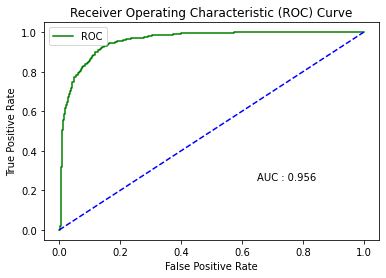

Testing accuracy: 0.8860569715142429


In [99]:
def plot_roc_curve(y_test, y_hatp_test):
    
    fper, tper, thresh = roc_curve(y_test, y_hatp_test) 
    auc = round(roc_auc_score(y_test, y_hatp_test),3)
    fig, ax = plt.subplots()
    plt.plot(fper, tper, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.65, 0.25,f'AUC : {auc}')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_hatp_test)

print(f'Testing accuracy: {accuracy_score(y_test, y_hat_test)}')

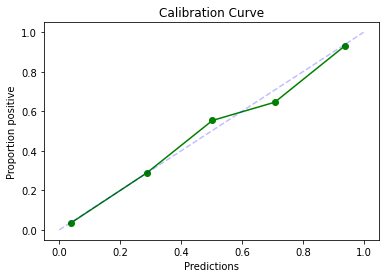

In [100]:
def plot_calib_curve(y_test, y_hatp_test):
    
    prop, pred = calibration_curve(y_test, y_hatp_test)
    fig, ax = plt.subplots()
    plt.plot(pred, prop, color='green', marker = 'o')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', alpha = 0.25)
    plt.xlabel('Predictions')
    plt.ylabel('Proportion positive')
    plt.title('Calibration Curve')
    plt.show()


plot_calib_curve(y_test, y_hatp_test)

# 8. Regularisation<a class="anchor" id="chapter8"></a>

In [101]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [102]:
file = 'prostate.data'
file_path = os.path.join(data_path, file)

df = pd.read_csv(file_path, sep='\t')
df = df.drop(columns=df.columns[0])
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [103]:
df_train = df[df['train']=='T']

df_test = df[df['train']=='F'] 
             
X_train = df_train[['lcavol', 'lweight','age','lbph','svi','lcp', 'gleason','pgg45']]
y_train = df_train['lpsa']

X_test = df_test[['lcavol', 'lweight','age','lbph','svi','lcp', 'gleason','pgg45']]
y_test = df_test['lpsa']

## Ridge<a class="anchor" id="section_8_1"></a>

Min error: 0.48726813469038793


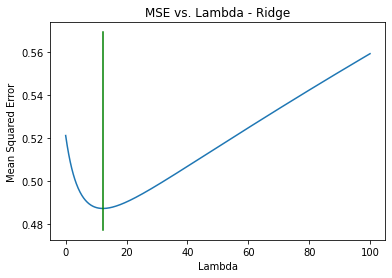

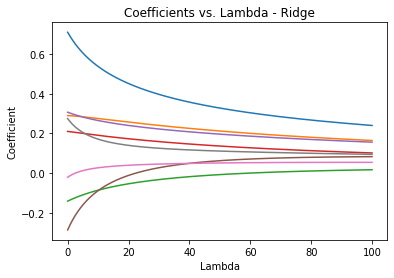

In [123]:
## recreation

from sklearn.pipeline import make_pipeline

lambdas_r = np.linspace(0, 100, 1000)
coefs_list_r = []
mse_list_r = []

for i in lambdas_r:
    
    model_r = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=float(i)))
    model_r.fit(X_train, y_train)
    y_hat_test = model_r.predict(X_test)
    coefs = model_r.named_steps['ridge'].coef_
    coefs_tuple = tuple([i, list(coefs)])
    coefs_list_r.append(coefs_tuple)
    mse = mean_squared_error(y_test, y_hat_test)
    mse_tuple = tuple([i, mse])
    mse_list_r.append(mse_tuple)

lamds_r = [x[0] for x in mse_list_r]
errors_r = [x[1] for x in mse_list_r]
coefs_r = [x[1] for x in coefs_list_r]

min_error = errors_r.index(min(errors_r))

fig, ax = plt.subplots()
plt.plot(lamds_r, errors_r)
plt.plot([lambdas_r[min_error],lambdas_r[min_error]], [min(errors_r)-0.01,max(errors_r)+0.01], color='green')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Lambda - Ridge')

fig, ax = plt.subplots()
for i in range(len(coefs_r[0])):
    plt.plot(lamds_r, [j[i] for j in coefs_r])
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('Coefficients vs. Lambda - Ridge')
    
print(f"Min error: {errors_r[min_error]}")

## Lasso<a class="anchor" id="section_8_2"></a>

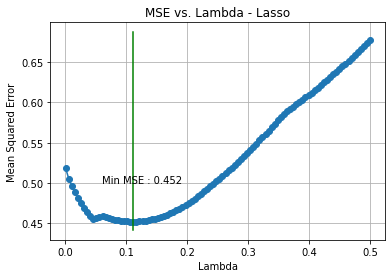

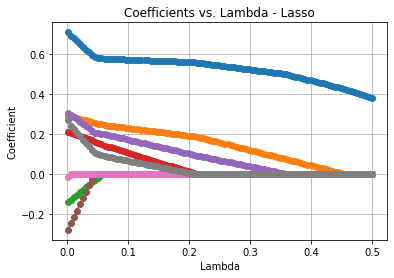

In [128]:
lambdas_l = np.linspace(0.001, 0.5, 100)
coefs_list_l = []
mse_list_l = []

for i in lambdas_l:
    
    model_l = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=float(i)))
    model_l.fit(X_train, y_train)
    y_hat_test = model_l.predict(X_test)
    coefs = model_l.named_steps['lasso'].coef_
    coefs_tuple = tuple([i,list(coefs)])
    coefs_list_l.append(coefs_tuple)
    mse = mean_squared_error(y_test, y_hat_test)
    mse_tuple = tuple([i,mse])
    mse_list_l.append(mse_tuple)
    
lamds_l = [x[0] for x in mse_list_l]
errors_l = [x[1] for x in mse_list_l]
coefs_l = [x[1] for x in coefs_list_l]

min_error = round(min(errors_l),3)
max_error = max(errors_l)
min_error_index = errors_l.index(min(errors_l))
best_lambda = lambdas_l[min_error_index]

fig, ax = plt.subplots()
plt.plot(lamds_l, errors_l, marker='o')
plt.plot([best_lambda, best_lambda], [min_error-0.01,max_error+0.01], color='green')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Lambda - Lasso')
plt.text(0.06, 0.5,f'Min MSE : {min_error}')
ax.grid()

fig, ax = plt.subplots()
for i in range(len(coefs_l[0])):
    ax.plot(lamds_l, [j[i] for j in coefs_l], marker='o')
ax.set_xlabel('Lambda')
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients vs. Lambda - Lasso')
ax.grid()